In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('posts_clean.csv', low_memory=False)
data = data.sample(frac=1).reset_index()
data = data.drop("index", axis=1)

# Drop outlier scores
data["Post Score"] = data["Post Score"]#.apply(lambda x: 30000 if x > 30000 else x)

# Initial data setup
## Split into training and testing

In [2]:
training = data[:int(len(data) * 0.85)]
testing = data[len(training):].reset_index().drop("index", axis=1)

x_training = training.drop("Post Score", axis=1)
x_training = x_training.drop("Post Comments", axis=1)
y_training = training["Post Score"]

x_testing = testing.drop("Post Score", axis=1)
x_testing = x_testing.drop("Post Comments", axis=1)
y_testing = testing["Post Score"]

## Feature selection

In [3]:
x_train = x_training
x_test = x_testing
y_train = y_training
y_test = y_testing

x_train = x_train.drop("Permalink", axis=1)
x_test = x_test.drop("Permalink", axis=1)
x_train = x_train.drop("Post ID", axis=1)
x_test = x_test.drop("Post ID", axis=1)
x_train = x_train.drop("Author ID", axis=1)
x_test = x_test.drop("Author ID", axis=1)
x_train = x_train.drop("Author Name", axis=1)
x_test = x_test.drop("Author Name", axis=1)
x_train = x_train.drop("Post Title", axis=1)
x_test = x_test.drop("Post Title", axis=1)
x_train = x_train.drop("Post Body", axis=1)
x_test = x_test.drop("Post Body", axis=1)
x_train = x_train.drop("Author Month", axis=1)
x_test = x_test.drop("Author Month", axis=1)
x_train = x_train.drop("Author Day", axis=1)
x_test = x_test.drop("Author Day", axis=1)
x_train = x_train.drop("Author Hour", axis=1)
x_test = x_test.drop("Author Hour", axis=1)
x_train = x_train.drop("Author Minute", axis=1)
x_test = x_test.drop("Author Minute", axis=1)
x_train = x_train.drop("Author Second", axis=1)
x_test = x_test.drop("Author Second", axis=1)

# Extra features to drop
x_train = x_train.drop("Post Year", axis=1)
x_test = x_test.drop("Post Year", axis=1)
x_train = x_train.drop("Post Month", axis=1)
x_test = x_test.drop("Post Month", axis=1)
x_train = x_train.drop("Post Day", axis=1)
x_test = x_test.drop("Post Day", axis=1)
x_train = x_train.drop("Post Minute", axis=1)
x_test = x_test.drop("Post Minute", axis=1)
x_train = x_train.drop("Post Second", axis=1)
x_test = x_test.drop("Post Second", axis=1)
x_train = x_train.drop("Post Title Length", axis=1)
x_test = x_test.drop("Post Title Length", axis=1)

# Unsure if we should remove these
# x_train = x_train.drop("Author Year", axis=1)
# x_test = x_test.drop("Author Year", axis=1)

# Convert NSFW boolean values to integers
x_train['Post NSFW'] = x_train['Post NSFW'].map({
    True : 1,
    False : 0
})

x_test['Post NSFW'] = x_test['Post NSFW'].map({
    True : 1,
    False : 0
})

# Convert Author Is Gold boolean values to integers
x_train['Author Is Gold'] = x_train['Author Is Gold'].map({
    True : 1,
    False : 0
})

x_test['Author Is Gold'] = x_test['Author Is Gold'].map({
    True : 1,
    False : 0
})

x_train_themes = x_train
x_test_themes = x_test

# Drop themes from x_train
x_train = x_train.drop("Work", axis=1)
x_test = x_test.drop("Work", axis=1)
x_train = x_train.drop("School", axis=1)
x_test = x_test.drop("School", axis=1)
x_train = x_train.drop("Home", axis=1)
x_test = x_test.drop("Home", axis=1)
x_train = x_train.drop("Boyfriend", axis=1)
x_test = x_test.drop("Boyfriend", axis=1)
x_train = x_train.drop("Girlfriend", axis=1)
x_test = x_test.drop("Girlfriend", axis=1)
x_train = x_train.drop("Pet", axis=1)
x_test = x_test.drop("Pet", axis=1)
x_train = x_train.drop("Sex", axis=1)
x_test = x_test.drop("Sex", axis=1)
x_train = x_train.drop("Food", axis=1)
x_test = x_test.drop("Food", axis=1)
x_train = x_train.drop("Bodily Fluids", axis=1)
x_test = x_test.drop("Bodily Fluids", axis=1)
x_train = x_train.drop("Police", axis=1)
x_test = x_test.drop("Police", axis=1)
x_train = x_train.drop("Hospital", axis=1)
x_test = x_test.drop("Hospital", axis=1)
x_train = x_train.drop("Car", axis=1)
x_test = x_test.drop("Car", axis=1)
x_train = x_train.drop("Public Transit", axis=1)
x_test = x_test.drop("Public Transit", axis=1)
x_train = x_train.drop("Shop", axis=1)
x_test = x_test.drop("Shop", axis=1)
x_train = x_train.drop("Bathroom", axis=1)
x_test = x_test.drop("Bathroom", axis=1)
x_train = x_train.drop("Body", axis=1)
x_test = x_test.drop("Body", axis=1)
x_train = x_train.drop("Gun", axis=1)
x_test = x_test.drop("Gun", axis=1)
x_train = x_train.drop("Fire", axis=1)
x_test = x_test.drop("Fire", axis=1)
x_train = x_train.drop("Drugs", axis=1)
x_test = x_test.drop("Drugs", axis=1)
x_train = x_train.drop("Death", axis=1)
x_test = x_test.drop("Death", axis=1)

print(x_test.head())

   Post Hour  Post Day of Week  Post NSFW  Post Body Length  \
0         11                 2          0               209   
1         16                 3          0               272   
2          1                 0          0                64   
3         12                 4          0               244   
4         18                 3          0               937   

   Author Comment Karma  Author Link Karma  Author Is Gold  Author Year  
0                   139                185               0         2015  
1                  1877                141               0         2015  
2                 16531              12637               0         2014  
3                   141                 10               0         2014  
4                   914                 94               0         2015  


In [4]:
# Turn theme words into binary instead of count
x_train_themes["Work"] = x_train_themes["Work"].map(lambda x: 1 if x > 0 else 0)
x_test_themes["Work"] = x_test_themes["Work"].map(lambda x: 1 if x > 0 else 0)
x_train_themes["School"] = x_train_themes["School"].map(lambda x: 1 if x > 0 else 0)
x_test_themes["School"] = x_test_themes["School"].map(lambda x: 1 if x > 0 else 0)
x_train_themes["Home"] = x_train_themes["Home"].map(lambda x: 1 if x > 0 else 0)
x_test_themes["Home"] = x_test_themes["Home"].map(lambda x: 1 if x > 0 else 0)
x_train_themes["Boyfriend"] = x_train_themes["Boyfriend"].map(lambda x: 1 if x > 0 else 0)
x_test_themes["Boyfriend"] = x_test_themes["Boyfriend"].map(lambda x: 1 if x > 0 else 0)
x_train_themes["Girlfriend"] = x_train_themes["Girlfriend"].map(lambda x: 1 if x > 0 else 0)
x_test_themes["Girlfriend"] = x_test_themes["Girlfriend"].map(lambda x: 1 if x > 0 else 0)
x_train_themes["Pet"] = x_train_themes["Pet"].map(lambda x: 1 if x > 0 else 0)
x_test_themes["Pet"] = x_test_themes["Pet"].map(lambda x: 1 if x > 0 else 0)
x_train_themes["Sex"] = x_train_themes["Sex"].map(lambda x: 1 if x > 0 else 0)
x_test_themes["Sex"] = x_test_themes["Sex"].map(lambda x: 1 if x > 0 else 0)
x_train_themes["Food"] = x_train_themes["Food"].map(lambda x: 1 if x > 0 else 0)
x_test_themes["Food"] = x_test_themes["Food"].map(lambda x: 1 if x > 0 else 0)
x_train_themes["Bodily Fluids"] = x_train_themes["Bodily Fluids"].map(lambda x: 1 if x > 0 else 0)
x_test_themes["Bodily Fluids"] = x_test_themes["Bodily Fluids"].map(lambda x: 1 if x > 0 else 0)
x_train_themes["Police"] = x_train_themes["Police"].map(lambda x: 1 if x > 0 else 0)
x_test_themes["Police"] = x_test_themes["Police"].map(lambda x: 1 if x > 0 else 0)
x_train_themes["Hospital"] = x_train_themes["Hospital"].map(lambda x: 1 if x > 0 else 0)
x_test_themes["Hospital"] = x_test_themes["Hospital"].map(lambda x: 1 if x > 0 else 0)
x_train_themes["Car"] = x_train_themes["Car"].map(lambda x: 1 if x > 0 else 0)
x_test_themes["Car"] = x_test_themes["Car"].map(lambda x: 1 if x > 0 else 0)
x_train_themes["Public Transit"] = x_train_themes["Public Transit"].map(lambda x: 1 if x > 0 else 0)
x_test_themes["Public Transit"] = x_test_themes["Public Transit"].map(lambda x: 1 if x > 0 else 0)
x_train_themes["Shop"] = x_train_themes["Shop"].map(lambda x: 1 if x > 0 else 0)
x_test_themes["Shop"] = x_test_themes["Shop"].map(lambda x: 1 if x > 0 else 0)
x_train_themes["Bathroom"] = x_train_themes["Bathroom"].map(lambda x: 1 if x > 0 else 0)
x_test_themes["Bathroom"] = x_test_themes["Bathroom"].map(lambda x: 1 if x > 0 else 0)
x_train_themes["Body"] = x_train_themes["Body"].map(lambda x: 1 if x > 0 else 0)
x_test_themes["Body"] = x_test_themes["Body"].map(lambda x: 1 if x > 0 else 0)
x_train_themes["Gun"] = x_train_themes["Gun"].map(lambda x: 1 if x > 0 else 0)
x_test_themes["Gun"] = x_test_themes["Gun"].map(lambda x: 1 if x > 0 else 0)
x_train_themes["Fire"] = x_train_themes["Fire"].map(lambda x: 1 if x > 0 else 0)
x_test_themes["Fire"] = x_test_themes["Fire"].map(lambda x: 1 if x > 0 else 0)
x_train_themes["Drugs"] = x_train_themes["Drugs"].map(lambda x: 1 if x > 0 else 0)
x_test_themes["Drugs"] = x_test_themes["Drugs"].map(lambda x: 1 if x > 0 else 0)
x_train_themes["Death"] = x_train_themes["Death"].map(lambda x: 1 if x > 0 else 0)
x_test_themes["Death"] = x_test_themes["Death"].map(lambda x: 1 if x > 0 else 0)

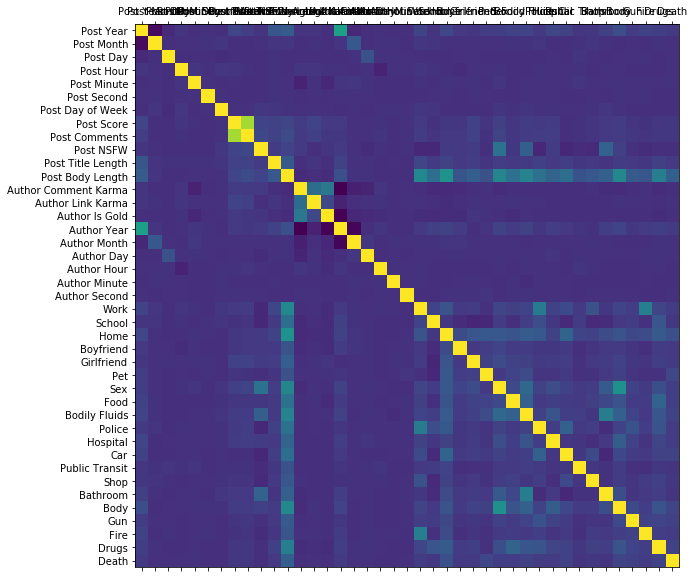

In [5]:
import matplotlib.pyplot as plt

def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

plot_corr(data, 10)

### Score Distribution

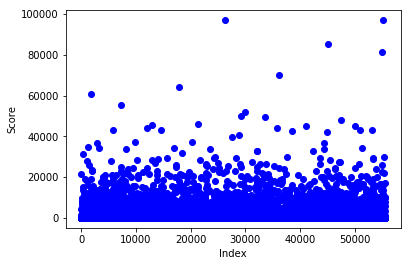

In [6]:
plt.plot(range(len(y_train)), y_train, 'bo')
plt.xlabel("Index")
plt.ylabel("Score")
plt.show()

# Linear Regression

0      2
1      3
2     10
3    994
4      1
Name: Post Score, dtype: int64
            0
0  185.860864
1  236.149663
2   77.713457
3  158.814638
4  611.815925
0.009904731200739869


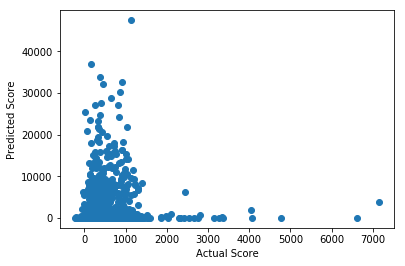

In [7]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression().fit(x_train, y_train)
linear_model_prediction = linear_model.predict(x_test)
linear_model_r2_score = linear_model.score(x_test, y_test)

print(y_test.head())
print(pd.DataFrame(linear_model_prediction).head())
print(linear_model_r2_score)

plt.scatter(linear_model_prediction, y_test)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.show()

## Add some more stop words

In [8]:
from sklearn.feature_extraction import text 

stop_words = text.ENGLISH_STOP_WORDS.union(["tifu"])

## Pulling title text out into vector

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
pd.options.display.max_columns = None

vectorizer = CountVectorizer(stop_words=stop_words, min_df=0.001, ngram_range=(2, 2))
vectorizer = vectorizer.fit(x_training["Post Title"])
x_train_words = vectorizer.transform(x_training["Post Title"]).toarray()
x_train_words = (pd.DataFrame(x_train_words, columns=vectorizer.get_feature_names()))

x_test_words = vectorizer.transform(x_testing["Post Title"]).toarray()
x_test_words = (pd.DataFrame(x_test_words, columns=vectorizer.get_feature_names()))

display(x_train_words.head())

x_train_title = x_train.join(x_train_words)
x_test_title = x_test.join(x_test_words)

#display(x_test_title.head())

# print(x_test_title.shape)
# print(x_train_title.shape)
# print(x_test_title.isnull().values.sum()/3095)

# x_test_title[:1]


,asking girl,best friend,best friends,brand new,brushing teeth,burning house,common fuckups,door open,falling asleep,fuckups megathread,getting caught,getting drunk,getting fired,getting high,going work,having sex,high school,job interview,making fun,megathread nsfw,old lady,paying attention,smoking weed,telling friend,telling girl,telling girlfriend,think im,throwing away,trying clean,trying fix,trying help,trying impress,trying make,trying save,year old
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Linear Regression with Title Words

0      2
1      3
2     10
3    994
4      1
Name: Post Score, dtype: int64
            0
0  182.322964
1  232.571957
2   84.579258
3  155.608971
4  600.978681
0.011471909601258212


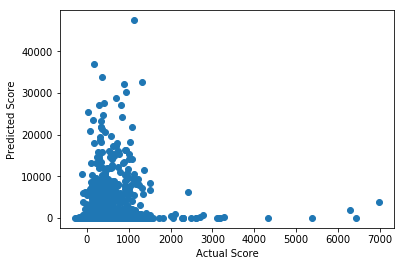

In [10]:
linear_model_title = LinearRegression().fit(x_train_title, y_train)
linear_model_prediction_title = linear_model_title.predict(x_test_title)
linear_model_title_r2_score = linear_model_title.score(x_test_title, y_test)

print(y_test.head())
print(pd.DataFrame(linear_model_prediction_title).head())
print(linear_model_title_r2_score)

plt.scatter(linear_model_prediction_title, y_test)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.show()

## Pulling Body Text Out into vector

In [11]:
vectorizerBody = CountVectorizer(stop_words=stop_words, min_df=0.01, ngram_range=(2, 2))
vectorizerBody = vectorizerBody.fit(x_training["Post Body"])
x_train_words_body = vectorizerBody.transform(x_training["Post Body"]).toarray()
x_train_words_body = (pd.DataFrame(x_train_words_body, columns=vectorizerBody.get_feature_names()))

x_test_words_body = vectorizerBody.transform(x_testing["Post Body"]).toarray()
x_test_words_body = (pd.DataFrame(x_test_words_body, columns=vectorizerBody.get_feature_names()))

x_train_body = x_train.join(x_train_words_body)
x_test_body = x_test.join(x_test_words_body)

display(x_train_body.shape)
display(x_train_body.head())

(55613, 191)

,Post Hour,Post Day of Week,Post NSFW,Post Body Length,Author Comment Karma,Author Link Karma,Author Is Gold,Author Year,10 minutes,10 years,15 minutes,20 minutes,30 minutes,30 seconds,45 minutes,actually happened,ago im,ago just,best friend,best friends,big deal,brand new,came home,come home,couple days,couple hours,couple minutes,couple months,couple weeks,couple years,day work,days ago,days later,decided try,did happen,did just,did know,didnt feel,didnt happen,didnt know,didnt notice,didnt realize,didnt really,didnt think,didnt want,don know,dont know,dont really,dont remember,dont think,dont want,door open,ended getting,eye contact,fast forward,feel bad,feel like,feeling like,feels like,fell asleep,felt like,finally got,friends house,fuck happened,getting ready,good idea,good time,got car,got home,got really,great idea,half hour,happen today,happened couple,happened days,happened hour,happened hours,happened just,happened months,happened night,happened today,happened week,happened year,happened years,happened yesterday,high school,holy shit,home work,hour ago,hour later,hours ago,hours later,ill just,im doing,im getting,im going,im gonna,im just,im like,im pretty,im really,im sitting,im sorry,im sure,im thinking,im trying,ive got,ive seen,just finished,just got,just happened,just like,just said,just say,just started,just wanted,just went,know im,late night,let know,like idiot,like im,like just,like shit,little bit,little did,living room,long story,long time,look face,look like,looked like,looking like,looks like,make sure,minutes ago,minutes later,month ago,months ago,needless say,obligatory didnt,obligatory happened,oh god,oh shit,open door,opened door,parking lot,paying attention,point im,pretty bad,pretty good,pretty sure,really bad,really good,rest day,right away,said yes,seconds later,started talking,story short,thank god,thing know,things like,think im,thought good,thought id,thought just,time got,time im,time just,tldr accidentally,tldr didnt,tldr got,tldr thought,tldr tried,tldr went,today fucked,today happened,today years,toilet paper,walked away,way home,week ago,weeks ago,went bathroom,went bed,went home,year ago,year old,years ago,years old
0,3,3,0,498,312,607,0,2017,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,13,6,0,420,847,739,0,2017,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,21,2,0,527,840,734,0,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,17,3,0,300,749,493,0,2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,18,0,0,404,0,3,0,2016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

## Linear regression with body words

0      2
1      3
2     10
3    994
4      1
Name: Post Score, dtype: int64
            0
0  198.637466
1  325.975722
2  220.074551
3  609.631281
4  487.278242
0.0024393278742099733


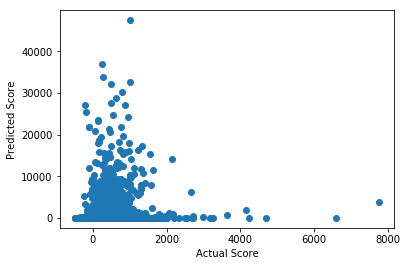

In [12]:
linear_model_body = LinearRegression().fit(x_train_body, y_train)
linear_model_prediction_body = linear_model_body.predict(x_test_body)
linear_model_body_r2_score = linear_model_body.score(x_test_body, y_test)

print(y_test.head())
print(pd.DataFrame(linear_model_prediction_body).head())
print(linear_model_body_r2_score)

plt.scatter(linear_model_prediction_body, y_test)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.show()

## Union of Body and Title Text

In [13]:
x_train_words_all_words = x_train_words.merge(x_train_words_body, how="outer", right_index=True, left_index=True).fillna(value=0)
x_test_words_all_words = x_test_words.merge(x_test_words_body, how="outer", right_index=True, left_index=True).fillna(value=0)

x_train_all_words = x_train.join(x_train_words_all_words)
x_test_all_words = x_test.join(x_test_words_all_words)

display(x_train_all_words.head())
display(x_train_all_words.shape)
display(y_train.shape)

,Post Hour,Post Day of Week,Post NSFW,Post Body Length,Author Comment Karma,Author Link Karma,Author Is Gold,Author Year,asking girl,best friend_x,best friends_x,brand new_x,brushing teeth,burning house,common fuckups,door open_x,falling asleep,fuckups megathread,getting caught,getting drunk,getting fired,getting high,going work,having sex,high school_x,job interview,making fun,megathread nsfw,old lady,paying attention_x,smoking weed,telling friend,telling girl,telling girlfriend,think im_x,throwing away,trying clean,trying fix,trying help,trying impress,trying make,trying save,year old_x,10 minutes,10 years,15 minutes,20 minutes,30 minutes,30 seconds,45 minutes,actually happened,ago im,ago just,best friend_y,best friends_y,big deal,brand new_y,came home,come home,couple days,couple hours,couple minutes,couple months,couple weeks,couple years,day work,days ago,days later,decided try,did happen,did just,did know,didnt feel,didnt happen,didnt know,didnt notice,didnt realize,didnt really,didnt think,didnt want,don know,dont know,dont really,dont remember,dont think,dont want,door open_y,ended getting,eye contact,fast forward,feel bad,feel like,feeling like,feels like,fell asleep,felt like,finally got,friends house,fuck happened,getting ready,good idea,good time,got car,got home,got really,great idea,half hour,happen today,happened couple,happened days,happened hour,happened hours,happened just,happened months,happened night,happened today,happened week,happened year,happened years,happened yesterday,high school_y,holy shit,home work,hour ago,hour later,hours ago,hours later,ill just,im doing,im getting,im going,im gonna,im just,im like,im pretty,im really,im sitting,im sorry,im sure,im thinking,im trying,ive got,ive seen,just finished,just got,just happened,just like,just said,just say,just started,just wanted,just went,know im,late night,let know,like idiot,like im,like just,like shit,little bit,little did,living room,long story,long time,look face,look like,looked like,looking like,looks like,make sure,minutes ago,minutes later,month ago,months ago,needless say,obligatory didnt,obligatory happened,oh god,oh shit,open door,opened door,parking lot,paying attention_y,point im,pretty bad,pretty good,pretty sure,really bad,really good,rest day,right away,said yes,seconds later,started talking,story short,thank god,thing know,things like,think im_y,thought good,thought id,thought just,time got,time im,time just,tldr accidentally,tldr didnt,tldr got,tldr thought,tldr tried,tldr went,today fucked,today happened,today years,toilet paper,walked away,way home,week ago,weeks ago,went bathroom,went bed,went home,year ago,year old_y,years ago,years old
0,3,3,0,498,312,607,0,2017,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,13,6,0,420,847,739,0,2017,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,21,2,0,527,840,734,0,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0

(55613, 226)

(55613,)

## Linear regression with all text

0      2
1      3
2     10
3    994
4      1
Name: Post Score, dtype: int64
            0
0  193.145927
1  330.514728
2  222.060462
3  591.469022
4  461.059391
0.0038530034484297593


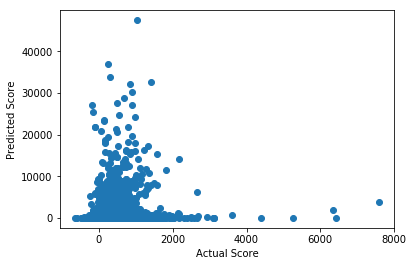

In [14]:
linear_model_all_words = LinearRegression().fit(x_train_all_words, y_train)
linear_model_prediction_all_words = linear_model_all_words.predict(x_test_all_words)
linear_model_all_words_r2_score = linear_model_all_words.score(x_test_all_words, y_test)

print(y_test.head())
print(pd.DataFrame(linear_model_prediction_all_words).head())
print(linear_model_all_words_r2_score)

plt.scatter(linear_model_prediction_all_words, y_test)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.show()

## TF-IDF Title Vector

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

title_tfidf_vectorizor = TfidfVectorizer(stop_words=stop_words, min_df=0.001, ngram_range=(2, 2)).fit(x_training["Post Title"])
x_train_tfidf_title_words = title_tfidf_vectorizor.transform(x_training["Post Title"]).toarray()
x_train_tfidf_title_words = (pd.DataFrame(x_train_tfidf_title_words, columns=title_tfidf_vectorizor.get_feature_names()))

x_test_tfidf_title_words = title_tfidf_vectorizor.transform(x_testing["Post Title"]).toarray()
x_test_tfidf_title_words = (pd.DataFrame(x_test_tfidf_title_words, columns=title_tfidf_vectorizor.get_feature_names()))


display(x_test_tfidf_title_words.head())

x_train_tfidf_title = x_train.join(x_train_tfidf_title_words)
x_test_tfidf_title = x_test.join(x_test_tfidf_title_words)

#display(x_train_tfidf_title.head())

# print(x_test_title.shape)
# print(x_train_title.shape)
# print(x_test_title.isnull().values.sum()/3095)

# x_test_title[:1]


,asking girl,best friend,best friends,brand new,brushing teeth,burning house,common fuckups,door open,falling asleep,fuckups megathread,getting caught,getting drunk,getting fired,getting high,going work,having sex,high school,job interview,making fun,megathread nsfw,old lady,paying attention,smoking weed,telling friend,telling girl,telling girlfriend,think im,throwing away,trying clean,trying fix,trying help,trying impress,trying make,trying save,year old
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## TF-IDF Title Linear Regression

0      2
1      3
2     10
3    994
4      1
Name: Post Score, dtype: int64
            0
0  182.465991
1  232.728631
2   84.823143
3  155.715975
4  600.966609
0.011584599717178512


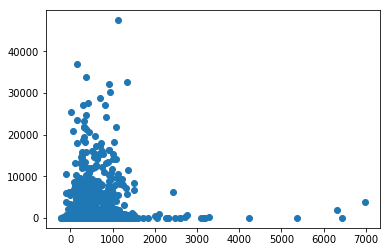

In [16]:
linear_model_tfidf_title = LinearRegression().fit(x_train_tfidf_title, y_train)
linear_model_prediction_tfidf_title = linear_model_tfidf_title.predict(x_test_tfidf_title)
linear_model_tfidf_title_r2_score = linear_model_tfidf_title.score(x_test_tfidf_title, y_test)

print(y_test.head())
print(pd.DataFrame(linear_model_prediction_tfidf_title).head())
print(linear_model_tfidf_title_r2_score)

plt.scatter(linear_model_prediction_tfidf_title, y_test)
plt.show()

### Linear Regression using theme words

0      2
1      3
2     10
3    994
4      1
Name: Post Score, dtype: int64
            0
0  182.465991
1  232.728631
2   84.823143
3  155.715975
4  600.966609
0.011584599717178512


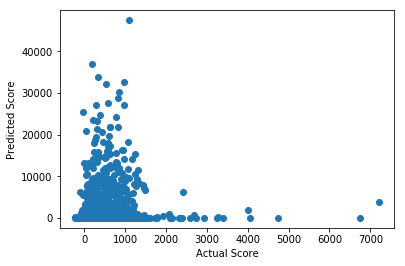

In [17]:
linear_model_themes = LinearRegression().fit(x_train_themes, y_train)
linear_model_themes_prediction = linear_model_themes.predict(x_test_themes)
linear_model_themes_r2_score = linear_model_themes.score(x_test_themes, y_test)

print(y_test.head())
print(pd.DataFrame(linear_model_prediction_tfidf_title).head())
print(linear_model_tfidf_title_r2_score)

plt.scatter(linear_model_themes_prediction, y_test)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.show()

# ---------------------------
# CLASSIFICATION
# ---------------------------
## Setting up data for classification

Set up three different classification:
score <= 10: Unsuccessful post
10 > score <= 1000: Successful post
score > 1000: Very successful post

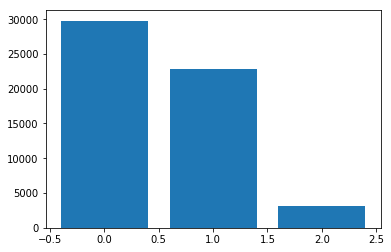

In [18]:
y_train_class = y_train.map(lambda x: 0 if x <= 10 else (1 if x <=500 else 2))
y_test_class = y_test.map(lambda x: 0 if x <= 10 else (1 if x <=500 else 2))

plt.bar([0, 1, 2], [(y_train_class == 0).sum(), (y_train_class == 1).sum(), (y_train_class == 2).sum()])
plt.show()


## Linear SVM Classification

In [19]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC(class_weight={0:18, 1:25, 2:140}).fit(x_train, y_train_class)
linear_svc_predicition = linear_svc.predict(x_test)

#print("Number of correct points out of a total %d points : %d" % (training_binary_x_one_d.shape[0],(testing_binary_y_one_d == y_pred).sum()))
print((y_test_class == linear_svc_predicition).sum()/x_test.shape[0])


0.5271523178807948


### Confusion Matrix

Normalized confusion matrix


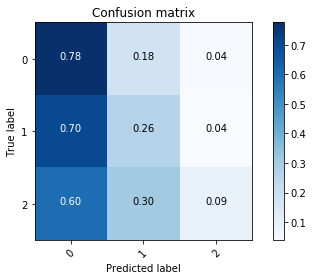

In [20]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
cm = confusion_matrix(y_test_class, linear_svc_predicition)
plot_confusion_matrix(cm, [0, 1, 2], True)

## Linear SVC with all words

In [21]:
linear_svc_all_words = LinearSVC(class_weight={0:18, 1:25, 2:140}).fit(x_train_all_words, y_train_class)
linear_svc_all_words_predicition = linear_svc_all_words.predict(x_test_all_words)

#print("Number of correct points out of a total %d points : %d" % (training_binary_x_one_d.shape[0],(testing_binary_y_one_d == y_pred).sum()))
print((y_test_class == linear_svc_predicition).sum()/x_test.shape[0])


0.5271523178807948


### Confusion matrix

Normalized confusion matrix


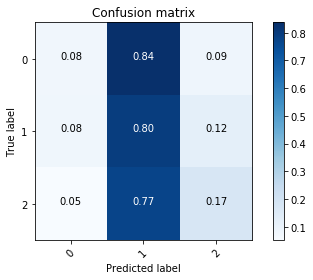

In [22]:
cm = confusion_matrix(y_test_class, linear_svc_all_words_predicition)
plot_confusion_matrix(cm, [0, 1, 2], True)

## Linear SVC with theme words

In [23]:
linear_svc_themes = LinearSVC(class_weight={0:18, 1:25, 2:140}).fit(x_train_themes, y_train_class)
linear_svc_themes_predicition = linear_svc_themes.predict(x_test_themes)

#print("Number of correct points out of a total %d points : %d" % (training_binary_x_one_d.shape[0],(testing_binary_y_one_d == y_pred).sum()))
print((y_test_class == linear_svc_themes_predicition).sum()/x_test.shape[0])


0.4143657666836475


### Confusion matrix

Normalized confusion matrix


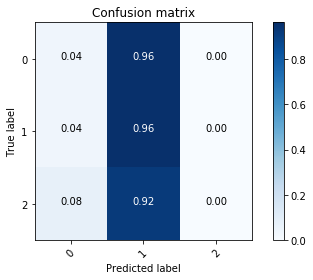

In [24]:
cm = confusion_matrix(y_test_class, linear_svc_themes_predicition)
plot_confusion_matrix(cm, [0, 1, 2], True)

## Gradient Boosting Classifier

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

boosting_classifier = GradientBoostingClassifier(n_estimators=1000, max_features=4).fit(x_train, y_train_class)
boosting_classifier_prediction = boosting_classifier.predict(x_test)

print((y_test_class == boosting_classifier_prediction).sum()/x_test.shape[0])

C:\Users\mdogj\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.5992868059093225


### Confusion Matrix

Normalized confusion matrix
[0.07422971 0.03698848 0.01596491 0.20450166 0.28422079 0.2993161
 0.00957984 0.0751985 ]


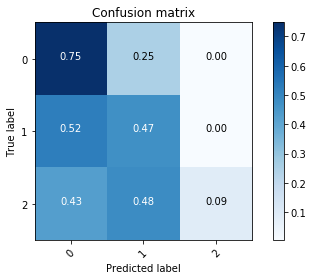

In [26]:
cm = confusion_matrix(y_test_class, boosting_classifier_prediction)
plot_confusion_matrix(cm, [0, 1, 2], True)

print(boosting_classifier.feature_importances_)

## Gradient Boosting with all words

In [27]:
boosting_classifier_all_words = GradientBoostingClassifier().fit(x_train_all_words, y_train_class)
boosting_classifier_all_words_prediction = boosting_classifier_all_words.predict(x_test_all_words)

print((y_test_class == boosting_classifier_all_words_prediction).sum()/x_test.shape[0])

0.5975547631176771


### Confusion Matrix

Normalized confusion matrix


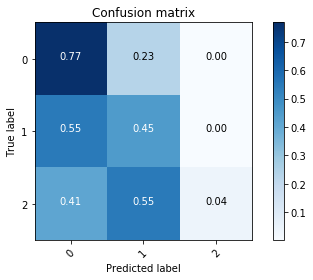

In [28]:
cm = confusion_matrix(y_test_class, boosting_classifier_all_words_prediction)
plot_confusion_matrix(cm, [0, 1, 2], True)

## Gradient Boosting, sample features, all words

In [30]:
boosting_classifier_sample_features = GradientBoostingClassifier(n_estimators=1000, max_features="sqrt").fit(x_train_all_words, y_train_class)
boosting_classifier_sample_features_prediction = boosting_classifier_sample_features.predict(x_test_all_words)

print((y_test_class == boosting_classifier_sample_features_prediction).sum()/x_test.shape[0])


0.5935812531839022


### Confusion Matrix

Normalized confusion matrix


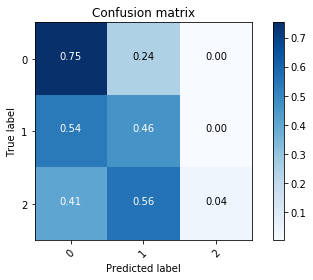

In [31]:
cm = confusion_matrix(y_test_class, boosting_classifier_sample_features_prediction)
plot_confusion_matrix(cm, [0, 1, 2], True)

## Gradient Boosting, theme words

In [32]:
boosting_classifier_themes = GradientBoostingClassifier(n_estimators=1000, max_features="sqrt").fit(x_train_themes, y_train_class)
boosting_classifier_themes_prediction = boosting_classifier_themes.predict(x_test_themes)

print((y_test_class == boosting_classifier_themes_prediction).sum()/x_test.shape[0])


0.604381049414162


### Confusion Matrix

Normalized confusion matrix


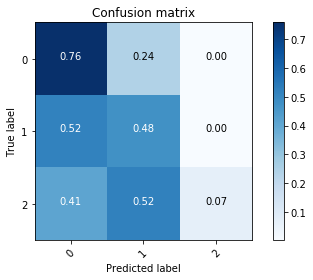

In [33]:
cm = confusion_matrix(y_test_class, boosting_classifier_themes_prediction)
plot_confusion_matrix(cm, [0, 1, 2], True)

## Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=1000, class_weight={0:18, 1:25, 2:140}, max_depth=7, max_features=4).fit(x_train, y_train_class)
rf_classifier_prediction = rf_classifier.predict(x_test)

print((y_test_class == rf_classifier_prediction).sum()/x_test.shape[0])


0.5205298013245033


### Confusion Matrix

Normalized confusion matrix


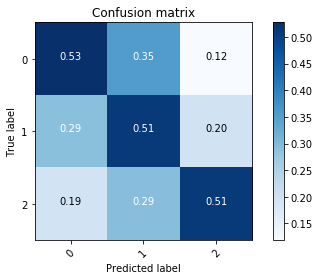

In [35]:
cm = confusion_matrix(y_test_class, rf_classifier_prediction)
plot_confusion_matrix(cm, [0, 1, 2], True)

## Random Forest Classifier with themes

In [36]:
rf_classifier_themes = RandomForestClassifier(n_estimators=1000, class_weight={0:18, 1:25, 2:140}, max_depth=7, max_features="sqrt").fit(x_train_themes, y_train_class)
rf_classifier_themes_prediction = rf_classifier_themes.predict(x_test_themes)

print((y_test_class == rf_classifier_themes_prediction).sum()/x_test_themes.shape[0])


0.5247070809984717


### Confusion Matrix

Normalized confusion matrix


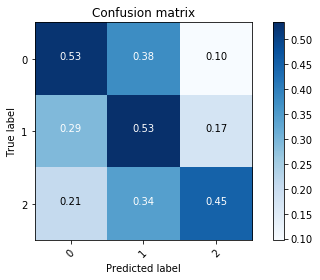

In [37]:
cm = confusion_matrix(y_test_class, rf_classifier_themes_prediction)
plot_confusion_matrix(cm, [0, 1, 2], True)

## Random Forest Classifier, with all words

In [38]:
rf_classifier_all_words = RandomForestClassifier(n_estimators=1000, class_weight={0:18, 1:25, 2:140}, max_depth=7, max_features="sqrt").fit(x_train_all_words, y_train_class)
rf_classifier_all_words_prediction = rf_classifier_all_words.predict(x_test_all_words)

print((y_test_class == rf_classifier_all_words_prediction).sum()/x_test.shape[0])

0.5449821701477331


### Confusion Matrix

Normalized confusion matrix


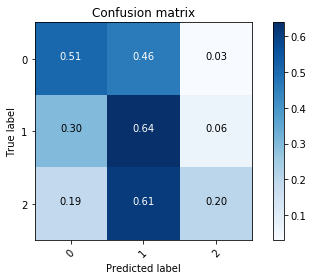

In [39]:
cm = confusion_matrix(y_test_class, rf_classifier_all_words_prediction)
plot_confusion_matrix(cm, [0, 1, 2], True)